### Basic EDA for Wind 

We are using 2023 as traing data. 

To add: 
Data units information. 

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

sns.set_style('whitegrid')

In [130]:
df = pd.read_csv(R"data\historique-production-electricite-quebec.csv")

In [175]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Year'] = (df['Date'] - timedelta(hours = 5)).dt.year 
df['Day_of_year'] = (df['Date'] - timedelta(hours= 5)).dt.day_of_year

count    43824.000000
mean       183.094788
std        105.424991
min          1.000000
25%         92.000000
50%        183.000000
75%        274.000000
max        366.000000
Name: Day_of_year, dtype: float64

In [157]:
df.groupby('Year').describe()

Hydroelectric                                                          \
              count          mean          std           min           25%   
Year                                                                         
2019         8760.0  23436.534702  5902.312338  10125.062558  18775.778808   
2020         8784.0  22642.011586  5603.443143  11357.871170  18386.393821   
2021         8760.0  23804.421045  5332.128629  11521.000000  20019.750000   
2022         8760.0  24086.660388  5544.893860  10714.000000  20055.500000   
2023         8760.0  21853.771155  5964.339043  10972.680000  17399.220000   

                                                  Wind               ...  \
               50%           75%           max   count         mean  ...   
Year                                                                 ...   
2019  22494.920049  28232.561741  36549.081665  8760.0  1391.743493  ...   
2020  21861.215001  26322.250803  36179.267903  8784.0  1340.094490  ...   
2021  22697.500000  27663.000000  36487.000000  8760.0  1198.025342  ...   
2022  23163.500000  27903.750000  37318.000000  8760.0  1283.676027  ...   
2023  20576.315000  26094.927500  36780.240000  8758.0  1104.878807  ...   

     Thermal           Total                                           \
         75%     max   count          mean          std           min   
Year                                                                    
2019     0.0  411.00  8760.0  25359.372374  6107.939939  13229.062558   
2020     0.0  409.00  8784.0  24514.897515  5537.895441  13912.800352   
2021     0.0  405.00  8760.0  25580.709287  5331.860586  14161.000000   
2022     0.0  418.00  8760.0  25947.693151  5561.576886  13949.000000   
2023     0.0  413.34  8760.0  23563.516155  5970.239310  13094.320000   

                                                              
               25%           50%           75%           max  
Year                                                          
2019  20479.605924  24083.771929  30343.872754  39678.081665  
2020  20387.896086  23701.880929  28393.628725  38800.618389  
2021  21754.500000  24317.500000  29607.250000  39491.000000  
2022  21898.000000  24745.000000  29882.750000  40556.000000  
2023  19099.275000  22200.240000  28026.802500  39233.970000  

[5 rows x 48 columns]

Notice that 2023 seema to be missing 2 entires for wind power.

In [177]:
wind_data= df[['Date', 'Year','Day_of_year', 'Wind']]

In [ ]:
wind_data.dropna()

,Date,Year,Day_of_year,Wind
0,2023-01-01 05:30:00+00:00,2023,1,151.07
1,2023-01-01 10:30:00+00:00,2023,1,679.07
2,2023-01-01 11:30:00+00:00,2023,1,829.70
3,2023-01-01 13:30:00+00:00,2023,1,863.91
4,2023-01-01 16:30:00+00:00,2023,1,639.35
...,...,...,...,...
43819,2023-12-31 12:30:00+00:00,2023,365,461.39
43820,2023-12-31 13:30:00+00:00,2023,365,481.74
43821,2023-12-31 16:30:00+00:00,2023,365,568.25
43822,2023-12-31 21:30:00+00:00,2023,365,939.07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Date         43824 non-null  datetime64[ns, UTC]
 1   Year         43824 non-null  int32              
 2   Day_of_year  43824 non-null  int32              
 3   Wind         43822 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int32(2)
memory usage: 1.0 MB


In [181]:
wind_test = wind_data[wind_data.Year >= 2023]

In [182]:
wind_test.Date.count()

np.int64(8760)

In [183]:
wind_train= wind_data[wind_data.Year <2023]

In [187]:
wind_train=wind_train.set_index('Date')

In [188]:
wind_train.head()

,Year,Day_of_year,Wind
Date,,,
2020-01-01 10:30:00+00:00,2020,1,510.0
2020-01-01 13:30:00+00:00,2020,1,460.0
2020-01-01 18:30:00+00:00,2020,1,1140.0
2020-01-01 20:30:00+00:00,2020,1,1333.0
2020-01-01 22:30:00+00:00,2020,1,1487.0


In [ ]:
daily_df = wind_train.resample('D').sum()
dail

In [190]:
daily_df.head()

,Year,Day_of_year,Wind
Date,,,
2019-01-01 00:00:00+00:00,38361,19,39169.0
2019-01-02 00:00:00+00:00,48456,43,46696.0
2019-01-03 00:00:00+00:00,48456,67,20896.0
2019-01-04 00:00:00+00:00,48456,91,29145.0
2019-01-05 00:00:00+00:00,48456,115,9838.0


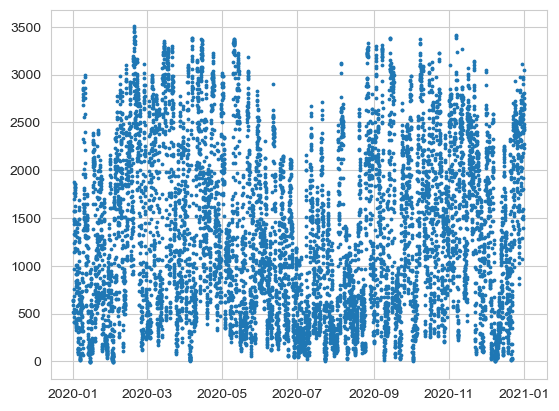

In [ ]:
wind_train_2020 = wind_train[wind_train.Year == 2020]


plt.scatter(wind_train_2020., wind_train_2020.Wind, s=3)